# 任务1: 简单线性回归分析
- 题目要求：对给定数据集进行数据准备、简单线性回归模型训练、模型评估步骤，并对结果进行可视化；

In [1]:
import pandas as pd
import numpy as np

# Read the data from the CSV file
women_data = pd.read_csv('./women.csv', index_col=0, header=0)
women_data

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129
7,64,132
8,65,135
9,66,139
10,67,142


In [2]:
women_data.describe().to_csv("women_data_description.csv")

In [3]:
pd.read_csv("./women_data_description.csv", index_col=0, header=0)

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


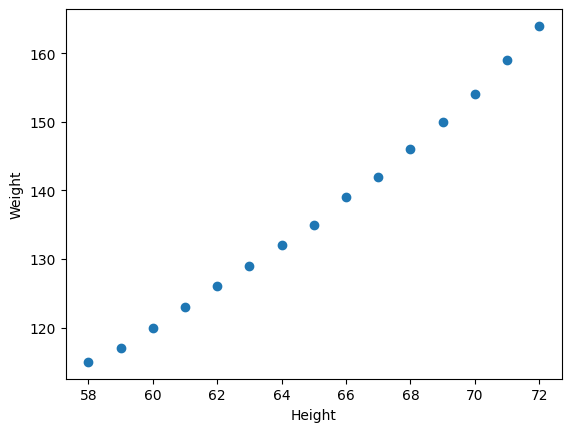

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(women_data["height"], women_data["weight"], label="Women")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [5]:
X = women_data["height"]
Y = women_data["weight"]
print(type(X))
print(type(Y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [6]:
Y = np.array(Y)
Y

array([115, 117, 120, 123, 126, 129, 132, 135, 139, 142, 146, 150, 154,
       159, 164])

In [7]:
! pip install -q statsmodels

In [8]:
import statsmodels.api as sm

X = sm.add_constant(X)
X

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [9]:
myModel = sm.OLS(Y, X)

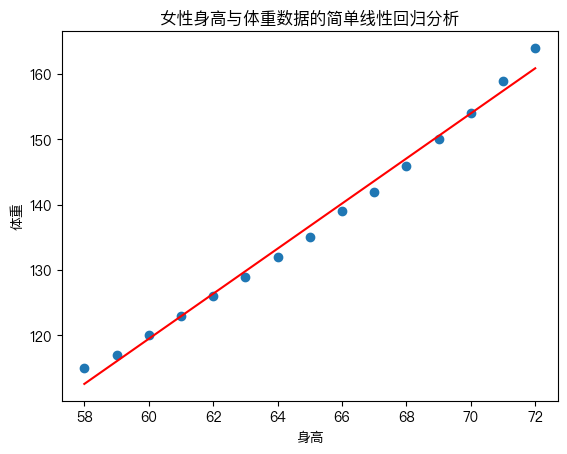

In [10]:
import matplotlib
matplotlib.rc("font",family='PingFang HK')
results = myModel.fit()
y_pred = results.predict()
plt.scatter(women_data["height"], women_data["weight"])
plt.plot(women_data["height"], y_pred, color="red")
plt.title("女性身高与体重数据的简单线性回归分析")
plt.xlabel("身高")
plt.ylabel("体重")
plt.show()

In [11]:
h = 63.5
results.predict((1, h))

array([131.55833333])

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.09e-14
Time:                        11:56:53   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

/Users/jiangcheng/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
results.params

const    -87.516667
height     3.450000
dtype: float64

In [14]:
results.rsquared

0.9910098326857505

In [15]:
results.aic

57.08157900640177

In [16]:
results.f_pvalue

1.0909729585997682e-14

In [17]:
results.resid

1     2.416667
2     0.966667
3     0.516667
4     0.066667
5    -0.383333
6    -0.833333
7    -1.283333
8    -1.733333
9    -1.183333
10   -1.633333
11   -1.083333
12   -0.533333
13    0.016667
14    1.566667
15    3.116667
dtype: float64

In [18]:
sm.stats.stattools.durbin_watson(results.resid)

0.3153803748621851

In [19]:
sm.stats.stattools.jarque_bera(results.resid)

(1.6595730644309743,
 0.4361423787323869,
 0.7893583826332262,
 2.5963042257390008)

In [20]:
y_pred = results.predict()
y_pred

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

- 多项式回归分析 
> 模型优化与重新选择

In [21]:
import pandas as pd
import numpy as np

X = women_data[["height"]]
Y = women_data["weight"]
X = np.column_stack((X,np.power(X,2), np.power(X,3)))
X

array([[    58,   3364, 195112],
       [    59,   3481, 205379],
       [    60,   3600, 216000],
       [    61,   3721, 226981],
       [    62,   3844, 238328],
       [    63,   3969, 250047],
       [    64,   4096, 262144],
       [    65,   4225, 274625],
       [    66,   4356, 287496],
       [    67,   4489, 300763],
       [    68,   4624, 314432],
       [    69,   4761, 328509],
       [    70,   4900, 343000],
       [    71,   5041, 357911],
       [    72,   5184, 373248]])

In [22]:
X_add_const = sm.add_constant(X)

X_add_const

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [23]:
myModel_updated = sm.OLS(Y, X_add_const)

In [24]:
results_updated = myModel_updated.fit()
results_updated.summary()

/Users/jiangcheng/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.07e-20
Time:                        11:57:09   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.011   -1545.102    -248.393
x1            46.4108     13.655      3.399      0.006      16.356      76.466
x2            -0.7462      0.211     -3.544      0.005      -1.210      -0.283
x3             0.0043      0.001      3.940      0.002       0.002       0.007
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.127
Skew:                           0.049   Prob(JB):                        0.939
Kurtosis:                       2.561   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
print('查看斜率及截距项：', results_updated.params)

查看斜率及截距项： const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [26]:
y_pred_updated = results_updated.predict()
y_pred_updated

array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

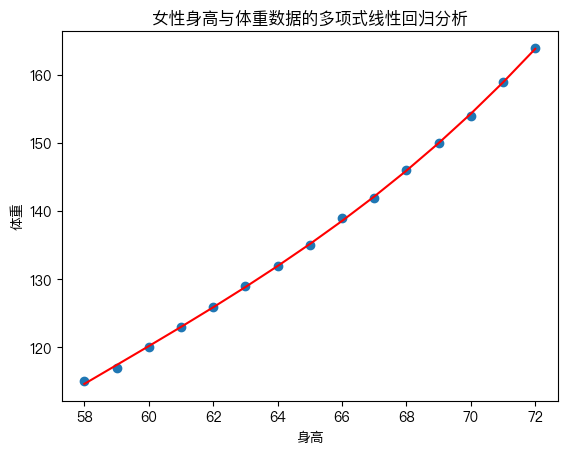

In [27]:
import matplotlib
matplotlib.rc("font",family='PingFang HK')
plt.scatter(women_data["height"], women_data["weight"])
plt.plot(women_data["height"], y_pred_updated, color="red")
plt.title('女性身高与体重数据的多项式线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')
plt.show()

In [28]:
h = 63.5
results_updated.predict((1,h,np.power(h,2),np.power(h,3)))

array([130.39340008])